# RNN Model with 1 to 6 Layers - with Dropout (0.2) & ES

In [1]:
import pandas as pd
import rnn_loop
from processing import preprocessing
from keras.models import load_model

In [2]:
# earlyStopping patience = 50 
# models = 6 
# epochs = 500
# dropout = 0.2

In [3]:
load_processed_df_from_disk = True

if load_processed_df_from_disk:
    # load processed spectoragramms
    data_df = pd.read_json('/datasets/UrbanSound8K/processed/mean_mfcc_data.json')

else:
    # preprocess the raw dataset
    data_df = preprocessing.load_dataset()
    data_df['feature'] = data_df['feature'].apply(preprocessing.calculate_mean_mfcc, preprocessing.DEFAULT_SAMPLE_RATE)

data_df = preprocessing.filter_mfccs(data_df)

X_train, X_test, y_train, y_test = preprocessing.create_training_data_RNN(data_df)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
num_outputs = data_df['label'].unique().shape[0]  # labels = 10

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("num_outputs: ", num_outputs)

X_train shape: (5861, 173, 40)
X_test shape: (1466, 173, 40)
y_train shape: (5861, 10)
y_test shape: (1466, 10)
num_outputs:  10


In [5]:
model = rnn_loop.RNN_loop(num_outputs, num_models=6, DP_rate=0.2)

In [6]:
model.build_RNN_model()

{'model_1': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f4c3ab92f60>,
 'model_2': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f4c3ab8f6d8>,
 'model_3': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f4c4b19cb70>,
 'model_4': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f4c6a58d9b0>,
 'model_5': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f4c4185a748>,
 'model_6': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f4c530cdc18>}

In [7]:
model.initialize(X_test, y_test)

 SUMMARY FOR MODEL  1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
46/46 [==============================] - 0s 8ms/step - loss: 2.3861 - accuracy: 0.0334
Pre-train

46/46 [==============================] - 0s 8ms/step - loss: 2.2921 - accuracy: 0.0975
Pre-training accuracy: 9.7544%

 SUMMARY FOR MODEL  6
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               86528     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)     

In [8]:
histories, durations = model.train(X_train, X_test, y_train, y_test, num_epochs=500, batch_size=256)

Training for model  1  has started.
Epoch 1/500
22/23 [===========================>..] - ETA: 0s - loss: 2.2676 - accuracy: 0.1349
Epoch 00001: val_loss improved from inf to 2.10382, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 27ms/step - loss: 2.2630 - accuracy: 0.1356 - val_loss: 2.1038 - val_accuracy: 0.2033
Epoch 2/500
22/23 [===========================>..] - ETA: 0s - loss: 2.0551 - accuracy: 0.2228
Epoch 00002: val_loss improved from 2.10382 to 1.89524, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 22ms/step - loss: 2.0511 - accuracy: 0.2239 - val_loss: 1.8952 - val_accuracy: 0.3131
Epoch 3/500
22/23 [===========================>..] - ETA: 0s - loss: 1.8688 - accuracy: 0.3086
Epoch 00003: val_loss improved from 1.89524 to 1.68744, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.8617 - accu

Epoch 25/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6236 - accuracy: 0.7862
Epoch 00025: val_loss improved from 0.60225 to 0.59889, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.6268 - accuracy: 0.7845 - val_loss: 0.5989 - val_accuracy: 0.8001
Epoch 26/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6183 - accuracy: 0.7972
Epoch 00026: val_loss improved from 0.59889 to 0.59727, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 0.6229 - accuracy: 0.7951 - val_loss: 0.5973 - val_accuracy: 0.7995
Epoch 27/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5972 - accuracy: 0.8042
Epoch 00027: val_loss improved from 0.59727 to 0.57818, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 22ms/step - loss: 0.5941 - accuracy: 0.8058 - val_loss: 0.57

Epoch 52/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3016 - accuracy: 0.8990
Epoch 00052: val_loss did not improve from 0.43693
23/23 [==============================] - 1s 24ms/step - loss: 0.3027 - accuracy: 0.8980 - val_loss: 0.4375 - val_accuracy: 0.8520
Epoch 53/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3051 - accuracy: 0.8988
Epoch 00053: val_loss improved from 0.43693 to 0.43062, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.3033 - accuracy: 0.8993 - val_loss: 0.4306 - val_accuracy: 0.8561
Epoch 54/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2869 - accuracy: 0.9027
Epoch 00054: val_loss improved from 0.43062 to 0.42837, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.2851 - accuracy: 0.9034 - val_loss: 0.4284 - val_accuracy: 0.8608
Epoch 55/500
22/23 [===================

Epoch 80/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1761 - accuracy: 0.9423
Epoch 00080: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 24ms/step - loss: 0.1779 - accuracy: 0.9406 - val_loss: 0.4223 - val_accuracy: 0.8827
Epoch 81/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1955 - accuracy: 0.9332
Epoch 00081: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 24ms/step - loss: 0.1984 - accuracy: 0.9323 - val_loss: 0.4634 - val_accuracy: 0.8643
Epoch 82/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2000 - accuracy: 0.9292
Epoch 00082: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 24ms/step - loss: 0.1995 - accuracy: 0.9295 - val_loss: 0.4530 - val_accuracy: 0.8738
Epoch 83/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1892 - accuracy: 0.9338
Epoch 00083: val_loss did not improve from 0.39093
23/23 [===============

Epoch 110/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1220 - accuracy: 0.9599
Epoch 00110: val_loss did not improve from 0.39093
23/23 [==============================] - 0s 21ms/step - loss: 0.1215 - accuracy: 0.9599 - val_loss: 0.4624 - val_accuracy: 0.8902
Epoch 111/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1230 - accuracy: 0.9592
Epoch 00111: val_loss did not improve from 0.39093
23/23 [==============================] - 0s 21ms/step - loss: 0.1220 - accuracy: 0.9596 - val_loss: 0.4482 - val_accuracy: 0.8854
Epoch 112/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1205 - accuracy: 0.9570
Epoch 00112: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 22ms/step - loss: 0.1228 - accuracy: 0.9558 - val_loss: 0.4322 - val_accuracy: 0.9018
Epoch 113/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1199 - accuracy: 0.9611
Epoch 00113: val_loss did not improve from 0.39093
23/23 [===========

Epoch 140/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0844 - accuracy: 0.9735
Epoch 00140: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 25ms/step - loss: 0.0849 - accuracy: 0.9727 - val_loss: 0.4962 - val_accuracy: 0.8943
Epoch 141/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0927 - accuracy: 0.9693
Epoch 00141: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 25ms/step - loss: 0.0964 - accuracy: 0.9679 - val_loss: 0.5408 - val_accuracy: 0.8881
Epoch 142/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1075 - accuracy: 0.9673
Epoch 00142: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 25ms/step - loss: 0.1075 - accuracy: 0.9672 - val_loss: 0.5099 - val_accuracy: 0.8888
Epoch 143/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1243 - accuracy: 0.9599
Epoch 00143: val_loss did not improve from 0.39093
23/23 [===========

Epoch 170/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1119 - accuracy: 0.9631
Epoch 00170: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 25ms/step - loss: 0.1112 - accuracy: 0.9631 - val_loss: 0.5536 - val_accuracy: 0.8888
Epoch 171/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1152 - accuracy: 0.9627
Epoch 00171: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 23ms/step - loss: 0.1161 - accuracy: 0.9620 - val_loss: 0.5982 - val_accuracy: 0.8793
Epoch 172/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1119 - accuracy: 0.9636
Epoch 00172: val_loss did not improve from 0.39093
23/23 [==============================] - 1s 24ms/step - loss: 0.1119 - accuracy: 0.9637 - val_loss: 0.5228 - val_accuracy: 0.8902
Epoch 173/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0823 - accuracy: 0.9741
Epoch 00173: val_loss did not improve from 0.39093
23/23 [===========

22/23 [===========================>..] - ETA: 0s - loss: 1.1481 - accuracy: 0.5993
Epoch 00009: val_loss improved from 1.01275 to 0.97565, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 1.1500 - accuracy: 0.5979 - val_loss: 0.9756 - val_accuracy: 0.6842
Epoch 10/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0801 - accuracy: 0.6229
Epoch 00010: val_loss improved from 0.97565 to 0.92379, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.0795 - accuracy: 0.6226 - val_loss: 0.9238 - val_accuracy: 0.6910
Epoch 11/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0582 - accuracy: 0.6323
Epoch 00011: val_loss improved from 0.92379 to 0.88479, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.0534 - accuracy: 0.6345 - val_loss: 0.8848 - val_accu

Epoch 35/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5752 - accuracy: 0.8088
Epoch 00035: val_loss did not improve from 0.65563
23/23 [==============================] - 1s 25ms/step - loss: 0.5695 - accuracy: 0.8103 - val_loss: 0.6792 - val_accuracy: 0.7913
Epoch 36/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5627 - accuracy: 0.8157
Epoch 00036: val_loss did not improve from 0.65563
23/23 [==============================] - 1s 25ms/step - loss: 0.5617 - accuracy: 0.8157 - val_loss: 0.6683 - val_accuracy: 0.7858
Epoch 37/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5510 - accuracy: 0.8171
Epoch 00037: val_loss improved from 0.65563 to 0.64588, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.5503 - accuracy: 0.8174 - val_loss: 0.6459 - val_accuracy: 0.7967
Epoch 38/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5475 - accuracy: 0.8198
Epoch 00

22/23 [===========================>..] - ETA: 0s - loss: 0.4007 - accuracy: 0.8638
Epoch 00063: val_loss did not improve from 0.62225
23/23 [==============================] - 1s 25ms/step - loss: 0.4025 - accuracy: 0.8644 - val_loss: 0.6359 - val_accuracy: 0.8226
Epoch 64/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4244 - accuracy: 0.8610
Epoch 00064: val_loss did not improve from 0.62225
23/23 [==============================] - 1s 24ms/step - loss: 0.4225 - accuracy: 0.8606 - val_loss: 0.6375 - val_accuracy: 0.8124
Epoch 65/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4076 - accuracy: 0.8674
Epoch 00065: val_loss did not improve from 0.62225
23/23 [==============================] - 1s 24ms/step - loss: 0.4079 - accuracy: 0.8666 - val_loss: 0.6355 - val_accuracy: 0.8172
Epoch 66/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3943 - accuracy: 0.8713
Epoch 00066: val_loss did not improve from 0.62225
23/23 [============================

Epoch 92/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3031 - accuracy: 0.9011
Epoch 00092: val_loss did not improve from 0.60895
23/23 [==============================] - 1s 25ms/step - loss: 0.3061 - accuracy: 0.9009 - val_loss: 0.6535 - val_accuracy: 0.8247
Epoch 93/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3206 - accuracy: 0.8906
Epoch 00093: val_loss did not improve from 0.60895
23/23 [==============================] - 1s 24ms/step - loss: 0.3213 - accuracy: 0.8903 - val_loss: 0.6316 - val_accuracy: 0.8233
Epoch 94/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3103 - accuracy: 0.8990
Epoch 00094: val_loss did not improve from 0.60895
23/23 [==============================] - 1s 25ms/step - loss: 0.3112 - accuracy: 0.8983 - val_loss: 0.6251 - val_accuracy: 0.8274
Epoch 95/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3163 - accuracy: 0.8910
Epoch 00095: val_loss did not improve from 0.60895
23/23 [===============

21/23 [==========================>...] - ETA: 0s - loss: 0.2551 - accuracy: 0.9135
Epoch 00121: val_loss did not improve from 0.58400
23/23 [==============================] - 0s 18ms/step - loss: 0.2528 - accuracy: 0.9137 - val_loss: 0.6746 - val_accuracy: 0.8308
Epoch 122/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2476 - accuracy: 0.9190
Epoch 00122: val_loss did not improve from 0.58400
23/23 [==============================] - 0s 20ms/step - loss: 0.2483 - accuracy: 0.9191 - val_loss: 0.6996 - val_accuracy: 0.8274
Epoch 123/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2454 - accuracy: 0.9180
Epoch 00123: val_loss did not improve from 0.58400
23/23 [==============================] - 0s 21ms/step - loss: 0.2477 - accuracy: 0.9172 - val_loss: 0.6811 - val_accuracy: 0.8356
Epoch 124/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2621 - accuracy: 0.9116
Epoch 00124: val_loss did not improve from 0.58400
23/23 [=========================

Epoch 151/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2102 - accuracy: 0.9293
Epoch 00151: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 23ms/step - loss: 0.2100 - accuracy: 0.9297 - val_loss: 0.6790 - val_accuracy: 0.8370
Epoch 152/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2222 - accuracy: 0.9274
Epoch 00152: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 25ms/step - loss: 0.2222 - accuracy: 0.9273 - val_loss: 0.6586 - val_accuracy: 0.8452
Epoch 153/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2176 - accuracy: 0.9281
Epoch 00153: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 25ms/step - loss: 0.2153 - accuracy: 0.9292 - val_loss: 0.6947 - val_accuracy: 0.8445
Epoch 154/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2087 - accuracy: 0.9343
Epoch 00154: val_loss did not improve from 0.58400
23/23 [===========

Epoch 181/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1871 - accuracy: 0.9357
Epoch 00181: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 25ms/step - loss: 0.1884 - accuracy: 0.9348 - val_loss: 0.6638 - val_accuracy: 0.8417
Epoch 182/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1807 - accuracy: 0.9400
Epoch 00182: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 25ms/step - loss: 0.1810 - accuracy: 0.9403 - val_loss: 0.6649 - val_accuracy: 0.8568
Epoch 183/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1792 - accuracy: 0.9403
Epoch 00183: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 24ms/step - loss: 0.1797 - accuracy: 0.9411 - val_loss: 0.7484 - val_accuracy: 0.8458
Epoch 184/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1818 - accuracy: 0.9411
Epoch 00184: val_loss did not improve from 0.58400
23/23 [===========

Epoch 211/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1730 - accuracy: 0.9446
Epoch 00211: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 24ms/step - loss: 0.1740 - accuracy: 0.9442 - val_loss: 0.7533 - val_accuracy: 0.8342
Epoch 212/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1723 - accuracy: 0.9425
Epoch 00212: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 25ms/step - loss: 0.1741 - accuracy: 0.9422 - val_loss: 0.8083 - val_accuracy: 0.8363
Epoch 213/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1605 - accuracy: 0.9473
Epoch 00213: val_loss did not improve from 0.58400
23/23 [==============================] - 1s 24ms/step - loss: 0.1587 - accuracy: 0.9476 - val_loss: 0.7382 - val_accuracy: 0.8445
Epoch 214/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1626 - accuracy: 0.9489
Epoch 00214: val_loss did not improve from 0.58400
23/23 [===========

Epoch 7/500
22/23 [===========================>..] - ETA: 0s - loss: 1.3124 - accuracy: 0.5140
Epoch 00007: val_loss improved from 1.21315 to 1.17722, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.3117 - accuracy: 0.5151 - val_loss: 1.1772 - val_accuracy: 0.6214
Epoch 8/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2800 - accuracy: 0.5382
Epoch 00008: val_loss improved from 1.17722 to 1.12731, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.2815 - accuracy: 0.5378 - val_loss: 1.1273 - val_accuracy: 0.6241
Epoch 9/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2258 - accuracy: 0.5540
Epoch 00009: val_loss improved from 1.12731 to 1.07186, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.2253 - accuracy: 0.5540 - val_loss: 1.0719 

Epoch 33/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6818 - accuracy: 0.7782
Epoch 00033: val_loss did not improve from 0.72432
23/23 [==============================] - 1s 24ms/step - loss: 0.6872 - accuracy: 0.7765 - val_loss: 0.7553 - val_accuracy: 0.7674
Epoch 34/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6712 - accuracy: 0.7830
Epoch 00034: val_loss improved from 0.72432 to 0.72207, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.6716 - accuracy: 0.7828 - val_loss: 0.7221 - val_accuracy: 0.7619
Epoch 35/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6664 - accuracy: 0.7809
Epoch 00035: val_loss improved from 0.72207 to 0.71533, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.6612 - accuracy: 0.7816 - val_loss: 0.7153 - val_accuracy: 0.7674
Epoch 36/500
22/23 [===================

Epoch 61/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4390 - accuracy: 0.8612
Epoch 00061: val_loss improved from 0.67497 to 0.67465, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.4371 - accuracy: 0.8616 - val_loss: 0.6746 - val_accuracy: 0.8008
Epoch 62/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4235 - accuracy: 0.8633
Epoch 00062: val_loss did not improve from 0.67465
23/23 [==============================] - 1s 23ms/step - loss: 0.4286 - accuracy: 0.8625 - val_loss: 0.7075 - val_accuracy: 0.7947
Epoch 63/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4338 - accuracy: 0.8619
Epoch 00063: val_loss did not improve from 0.67465
23/23 [==============================] - 1s 25ms/step - loss: 0.4323 - accuracy: 0.8615 - val_loss: 0.6891 - val_accuracy: 0.7981
Epoch 64/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4282 - accuracy: 0.8590
Epoch 00

Epoch 90/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3400 - accuracy: 0.8962
Epoch 00090: val_loss did not improve from 0.65865
23/23 [==============================] - 0s 21ms/step - loss: 0.3382 - accuracy: 0.8971 - val_loss: 0.6748 - val_accuracy: 0.8090
Epoch 91/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3223 - accuracy: 0.9011
Epoch 00091: val_loss did not improve from 0.65865
23/23 [==============================] - 0s 21ms/step - loss: 0.3237 - accuracy: 0.9000 - val_loss: 0.6798 - val_accuracy: 0.8083
Epoch 92/500
23/23 [==============================] - ETA: 0s - loss: 0.3258 - accuracy: 0.8935
Epoch 00092: val_loss did not improve from 0.65865
23/23 [==============================] - 0s 21ms/step - loss: 0.3258 - accuracy: 0.8935 - val_loss: 0.6613 - val_accuracy: 0.8192
Epoch 93/500
20/23 [=========================>....] - ETA: 0s - loss: 0.3117 - accuracy: 0.9061
Epoch 00093: val_loss did not improve from 0.65865
23/23 [===============

22/23 [===========================>..] - ETA: 0s - loss: 0.2675 - accuracy: 0.9192
Epoch 00119: val_loss did not improve from 0.65667
23/23 [==============================] - 1s 25ms/step - loss: 0.2695 - accuracy: 0.9179 - val_loss: 0.7271 - val_accuracy: 0.8165
Epoch 120/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2765 - accuracy: 0.9165
Epoch 00120: val_loss did not improve from 0.65667
23/23 [==============================] - 1s 25ms/step - loss: 0.2802 - accuracy: 0.9150 - val_loss: 0.6980 - val_accuracy: 0.8295
Epoch 121/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2641 - accuracy: 0.9150
Epoch 00121: val_loss did not improve from 0.65667
23/23 [==============================] - 1s 26ms/step - loss: 0.2653 - accuracy: 0.9145 - val_loss: 0.6942 - val_accuracy: 0.8329
Epoch 122/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2799 - accuracy: 0.9112
Epoch 00122: val_loss did not improve from 0.65667
23/23 [=========================

22/23 [===========================>..] - ETA: 0s - loss: 0.2463 - accuracy: 0.9247
Epoch 00148: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.2476 - accuracy: 0.9239 - val_loss: 0.7391 - val_accuracy: 0.8261
Epoch 149/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2332 - accuracy: 0.9251
Epoch 00149: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.2318 - accuracy: 0.9253 - val_loss: 0.7276 - val_accuracy: 0.8274
Epoch 150/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2281 - accuracy: 0.9284
Epoch 00150: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.2267 - accuracy: 0.9283 - val_loss: 0.7285 - val_accuracy: 0.8349
Epoch 151/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2217 - accuracy: 0.9313
Epoch 00151: val_loss did not improve from 0.65071
23/23 [=========================

Epoch 178/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2127 - accuracy: 0.9350
Epoch 00178: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.2130 - accuracy: 0.9353 - val_loss: 0.7120 - val_accuracy: 0.8349
Epoch 179/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2032 - accuracy: 0.9384
Epoch 00179: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.2031 - accuracy: 0.9386 - val_loss: 0.7529 - val_accuracy: 0.8404
Epoch 180/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2096 - accuracy: 0.9352
Epoch 00180: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.2094 - accuracy: 0.9353 - val_loss: 0.7046 - val_accuracy: 0.8308
Epoch 181/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1938 - accuracy: 0.9423
Epoch 00181: val_loss did not improve from 0.65071
23/23 [===========

Epoch 208/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1806 - accuracy: 0.9464
Epoch 00208: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1812 - accuracy: 0.9463 - val_loss: 0.7419 - val_accuracy: 0.8438
Epoch 209/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1672 - accuracy: 0.9467
Epoch 00209: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1666 - accuracy: 0.9473 - val_loss: 0.7641 - val_accuracy: 0.8356
Epoch 210/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1607 - accuracy: 0.9529
Epoch 00210: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 24ms/step - loss: 0.1619 - accuracy: 0.9522 - val_loss: 0.7652 - val_accuracy: 0.8397
Epoch 211/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1685 - accuracy: 0.9466
Epoch 00211: val_loss did not improve from 0.65071
23/23 [===========

Epoch 238/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1449 - accuracy: 0.9551
Epoch 00238: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 23ms/step - loss: 0.1494 - accuracy: 0.9543 - val_loss: 0.8108 - val_accuracy: 0.8486
Epoch 239/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1490 - accuracy: 0.9592
Epoch 00239: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 24ms/step - loss: 0.1504 - accuracy: 0.9589 - val_loss: 0.8353 - val_accuracy: 0.8506
Epoch 240/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1846 - accuracy: 0.9448
Epoch 00240: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 24ms/step - loss: 0.1837 - accuracy: 0.9452 - val_loss: 0.7710 - val_accuracy: 0.8452
Epoch 241/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1479 - accuracy: 0.9542
Epoch 00241: val_loss did not improve from 0.65071
23/23 [===========

Epoch 268/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1324 - accuracy: 0.9599
Epoch 00268: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1337 - accuracy: 0.9592 - val_loss: 0.7669 - val_accuracy: 0.8472
Epoch 269/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1466 - accuracy: 0.9576
Epoch 00269: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1447 - accuracy: 0.9580 - val_loss: 0.7673 - val_accuracy: 0.8595
Epoch 270/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1536 - accuracy: 0.9531
Epoch 00270: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1516 - accuracy: 0.9538 - val_loss: 0.7832 - val_accuracy: 0.8547
Epoch 271/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1634 - accuracy: 0.9498
Epoch 00271: val_loss did not improve from 0.65071
23/23 [===========

Epoch 298/500
23/23 [==============================] - ETA: 0s - loss: 0.1337 - accuracy: 0.9599
Epoch 00298: val_loss did not improve from 0.65071
23/23 [==============================] - 0s 20ms/step - loss: 0.1337 - accuracy: 0.9599 - val_loss: 0.7293 - val_accuracy: 0.8554
Epoch 299/500
23/23 [==============================] - ETA: 0s - loss: 0.1246 - accuracy: 0.9613
Epoch 00299: val_loss did not improve from 0.65071
23/23 [==============================] - 0s 21ms/step - loss: 0.1246 - accuracy: 0.9613 - val_loss: 0.7182 - val_accuracy: 0.8602
Epoch 300/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1266 - accuracy: 0.9622
Epoch 00300: val_loss did not improve from 0.65071
23/23 [==============================] - 0s 21ms/step - loss: 0.1275 - accuracy: 0.9614 - val_loss: 0.8023 - val_accuracy: 0.8527
Epoch 301/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1215 - accuracy: 0.9659
Epoch 00301: val_loss did not improve from 0.65071
23/23 [===========

Epoch 328/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0979 - accuracy: 0.9714
Epoch 00328: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 24ms/step - loss: 0.0978 - accuracy: 0.9713 - val_loss: 0.7855 - val_accuracy: 0.8649
Epoch 329/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1038 - accuracy: 0.9688
Epoch 00329: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1031 - accuracy: 0.9688 - val_loss: 0.7614 - val_accuracy: 0.8697
Epoch 330/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1108 - accuracy: 0.9664
Epoch 00330: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1120 - accuracy: 0.9660 - val_loss: 0.7742 - val_accuracy: 0.8629
Epoch 331/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1004 - accuracy: 0.9700
Epoch 00331: val_loss did not improve from 0.65071
23/23 [===========

Epoch 358/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1032 - accuracy: 0.9705
Epoch 00358: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1029 - accuracy: 0.9708 - val_loss: 0.7269 - val_accuracy: 0.8670
Epoch 359/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1095 - accuracy: 0.9693
Epoch 00359: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 25ms/step - loss: 0.1096 - accuracy: 0.9686 - val_loss: 0.7848 - val_accuracy: 0.8561
Epoch 360/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1069 - accuracy: 0.9703
Epoch 00360: val_loss did not improve from 0.65071
23/23 [==============================] - 1s 24ms/step - loss: 0.1047 - accuracy: 0.9712 - val_loss: 0.7885 - val_accuracy: 0.8581
Epoch 361/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1037 - accuracy: 0.9711
Epoch 00361: val_loss did not improve from 0.65071
23/23 [===========

22/23 [===========================>..] - ETA: 0s - loss: 1.5459 - accuracy: 0.4288
Epoch 00004: val_loss improved from 1.42503 to 1.34589, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.5445 - accuracy: 0.4284 - val_loss: 1.3459 - val_accuracy: 0.5286
Epoch 5/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4452 - accuracy: 0.4730
Epoch 00005: val_loss improved from 1.34589 to 1.28722, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.4408 - accuracy: 0.4736 - val_loss: 1.2872 - val_accuracy: 0.5443
Epoch 6/500
22/23 [===========================>..] - ETA: 0s - loss: 1.3887 - accuracy: 0.4890
Epoch 00006: val_loss improved from 1.28722 to 1.20354, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.3872 - accuracy: 0.4905 - val_loss: 1.2035 - val_accura

Epoch 29/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6849 - accuracy: 0.7809
Epoch 00029: val_loss did not improve from 0.75840
23/23 [==============================] - 1s 26ms/step - loss: 0.6803 - accuracy: 0.7811 - val_loss: 0.7684 - val_accuracy: 0.7619
Epoch 30/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6841 - accuracy: 0.7834
Epoch 00030: val_loss did not improve from 0.75840
23/23 [==============================] - 1s 25ms/step - loss: 0.6830 - accuracy: 0.7826 - val_loss: 0.7635 - val_accuracy: 0.7551
Epoch 31/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6726 - accuracy: 0.7837
Epoch 00031: val_loss improved from 0.75840 to 0.73371, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.6713 - accuracy: 0.7850 - val_loss: 0.7337 - val_accuracy: 0.7667
Epoch 32/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6683 - accuracy: 0.7848
Epoch 00

Epoch 58/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4792 - accuracy: 0.8564
Epoch 00058: val_loss improved from 0.72327 to 0.72053, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.4807 - accuracy: 0.8545 - val_loss: 0.7205 - val_accuracy: 0.7831
Epoch 59/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4430 - accuracy: 0.8612
Epoch 00059: val_loss did not improve from 0.72053
23/23 [==============================] - 1s 24ms/step - loss: 0.4414 - accuracy: 0.8609 - val_loss: 0.7412 - val_accuracy: 0.7926
Epoch 60/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4480 - accuracy: 0.8622
Epoch 00060: val_loss did not improve from 0.72053
23/23 [==============================] - 1s 26ms/step - loss: 0.4511 - accuracy: 0.8616 - val_loss: 0.7460 - val_accuracy: 0.7967
Epoch 61/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4680 - accuracy: 0.8569
Epoch 00

Epoch 87/500
23/23 [==============================] - ETA: 0s - loss: 0.3558 - accuracy: 0.8889
Epoch 00087: val_loss did not improve from 0.69272
23/23 [==============================] - 1s 24ms/step - loss: 0.3558 - accuracy: 0.8889 - val_loss: 0.7442 - val_accuracy: 0.8056
Epoch 88/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3727 - accuracy: 0.8839
Epoch 00088: val_loss did not improve from 0.69272
23/23 [==============================] - 1s 26ms/step - loss: 0.3710 - accuracy: 0.8836 - val_loss: 0.7137 - val_accuracy: 0.8104
Epoch 89/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3605 - accuracy: 0.8874
Epoch 00089: val_loss did not improve from 0.69272
23/23 [==============================] - 1s 26ms/step - loss: 0.3610 - accuracy: 0.8877 - val_loss: 0.7333 - val_accuracy: 0.8124
Epoch 90/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3351 - accuracy: 0.8960
Epoch 00090: val_loss did not improve from 0.69272
23/23 [===============

22/23 [===========================>..] - ETA: 0s - loss: 0.3428 - accuracy: 0.9004
Epoch 00116: val_loss did not improve from 0.68163
23/23 [==============================] - 0s 20ms/step - loss: 0.3429 - accuracy: 0.9005 - val_loss: 0.7069 - val_accuracy: 0.8220
Epoch 117/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3271 - accuracy: 0.9022
Epoch 00117: val_loss did not improve from 0.68163
23/23 [==============================] - 0s 21ms/step - loss: 0.3245 - accuracy: 0.9024 - val_loss: 0.7189 - val_accuracy: 0.8261
Epoch 118/500
23/23 [==============================] - ETA: 0s - loss: 0.3230 - accuracy: 0.9012
Epoch 00118: val_loss did not improve from 0.68163
23/23 [==============================] - 0s 21ms/step - loss: 0.3230 - accuracy: 0.9012 - val_loss: 0.7461 - val_accuracy: 0.8206
Epoch 119/500
20/23 [=========================>....] - ETA: 0s - loss: 0.3306 - accuracy: 0.9006
Epoch 00119: val_loss did not improve from 0.68163
23/23 [=========================

Epoch 146/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2661 - accuracy: 0.9240
Epoch 00146: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 25ms/step - loss: 0.2661 - accuracy: 0.9234 - val_loss: 0.8087 - val_accuracy: 0.8267
Epoch 147/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2440 - accuracy: 0.9228
Epoch 00147: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 24ms/step - loss: 0.2450 - accuracy: 0.9222 - val_loss: 0.7933 - val_accuracy: 0.8213
Epoch 148/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2382 - accuracy: 0.9300
Epoch 00148: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 26ms/step - loss: 0.2352 - accuracy: 0.9300 - val_loss: 0.7788 - val_accuracy: 0.8274
Epoch 149/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2554 - accuracy: 0.9201
Epoch 00149: val_loss did not improve from 0.68163
23/23 [===========

Epoch 176/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2251 - accuracy: 0.9364
Epoch 00176: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 26ms/step - loss: 0.2259 - accuracy: 0.9358 - val_loss: 0.7798 - val_accuracy: 0.8220
Epoch 177/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2161 - accuracy: 0.9357
Epoch 00177: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 26ms/step - loss: 0.2178 - accuracy: 0.9341 - val_loss: 0.8078 - val_accuracy: 0.8261
Epoch 178/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2187 - accuracy: 0.9386
Epoch 00178: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 25ms/step - loss: 0.2178 - accuracy: 0.9387 - val_loss: 0.7599 - val_accuracy: 0.8302
Epoch 179/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2245 - accuracy: 0.9345
Epoch 00179: val_loss did not improve from 0.68163
23/23 [===========

Epoch 206/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2210 - accuracy: 0.9354
Epoch 00206: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 25ms/step - loss: 0.2183 - accuracy: 0.9367 - val_loss: 0.7649 - val_accuracy: 0.8302
Epoch 207/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1893 - accuracy: 0.9482
Epoch 00207: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 24ms/step - loss: 0.1944 - accuracy: 0.9464 - val_loss: 0.7965 - val_accuracy: 0.8329
Epoch 208/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2049 - accuracy: 0.9435
Epoch 00208: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 25ms/step - loss: 0.2073 - accuracy: 0.9428 - val_loss: 0.8397 - val_accuracy: 0.8377
Epoch 209/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2140 - accuracy: 0.9389
Epoch 00209: val_loss did not improve from 0.68163
23/23 [===========

Epoch 236/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1847 - accuracy: 0.9471
Epoch 00236: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 24ms/step - loss: 0.1884 - accuracy: 0.9457 - val_loss: 0.7970 - val_accuracy: 0.8404
Epoch 237/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1921 - accuracy: 0.9487
Epoch 00237: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 26ms/step - loss: 0.1918 - accuracy: 0.9481 - val_loss: 0.7438 - val_accuracy: 0.8349
Epoch 238/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2074 - accuracy: 0.9395
Epoch 00238: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 25ms/step - loss: 0.2062 - accuracy: 0.9394 - val_loss: 0.7517 - val_accuracy: 0.8356
Epoch 239/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1804 - accuracy: 0.9464
Epoch 00239: val_loss did not improve from 0.68163
23/23 [===========

Epoch 266/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1763 - accuracy: 0.9505
Epoch 00266: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 26ms/step - loss: 0.1777 - accuracy: 0.9500 - val_loss: 0.7781 - val_accuracy: 0.8377
Epoch 267/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1832 - accuracy: 0.9506
Epoch 00267: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 26ms/step - loss: 0.1830 - accuracy: 0.9507 - val_loss: 0.8033 - val_accuracy: 0.8308
Epoch 268/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1875 - accuracy: 0.9496
Epoch 00268: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 24ms/step - loss: 0.1875 - accuracy: 0.9495 - val_loss: 0.7979 - val_accuracy: 0.8383
Epoch 269/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1725 - accuracy: 0.9494
Epoch 00269: val_loss did not improve from 0.68163
23/23 [===========

Epoch 296/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1546 - accuracy: 0.9553
Epoch 00296: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 24ms/step - loss: 0.1550 - accuracy: 0.9551 - val_loss: 0.7989 - val_accuracy: 0.8404
Epoch 297/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1808 - accuracy: 0.9503
Epoch 00297: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 26ms/step - loss: 0.1839 - accuracy: 0.9492 - val_loss: 0.7758 - val_accuracy: 0.8411
Epoch 298/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1581 - accuracy: 0.9547
Epoch 00298: val_loss did not improve from 0.68163
23/23 [==============================] - 1s 25ms/step - loss: 0.1583 - accuracy: 0.9543 - val_loss: 0.7962 - val_accuracy: 0.8404
Epoch 299/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1620 - accuracy: 0.9540
Epoch 00299: val_loss did not improve from 0.68163
23/23 [===========

Epoch 2/500
22/23 [===========================>..] - ETA: 0s - loss: 1.8400 - accuracy: 0.3235
Epoch 00002: val_loss improved from 1.81379 to 1.66351, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 1.8336 - accuracy: 0.3264 - val_loss: 1.6635 - val_accuracy: 0.3820
Epoch 3/500
22/23 [===========================>..] - ETA: 0s - loss: 1.7044 - accuracy: 0.3700
Epoch 00003: val_loss improved from 1.66351 to 1.52839, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.7006 - accuracy: 0.3723 - val_loss: 1.5284 - val_accuracy: 0.4372
Epoch 4/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5720 - accuracy: 0.4238
Epoch 00004: val_loss improved from 1.52839 to 1.38753, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.5693 - accuracy: 0.4250 - val_loss: 1.3875 

Epoch 27/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7024 - accuracy: 0.7713
Epoch 00027: val_loss did not improve from 0.75155
23/23 [==============================] - 1s 26ms/step - loss: 0.7012 - accuracy: 0.7717 - val_loss: 0.7679 - val_accuracy: 0.7640
Epoch 28/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6871 - accuracy: 0.7818
Epoch 00028: val_loss did not improve from 0.75155
23/23 [==============================] - 1s 25ms/step - loss: 0.6875 - accuracy: 0.7823 - val_loss: 0.7548 - val_accuracy: 0.7790
Epoch 29/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6647 - accuracy: 0.7924
Epoch 00029: val_loss did not improve from 0.75155
23/23 [==============================] - 1s 24ms/step - loss: 0.6644 - accuracy: 0.7917 - val_loss: 0.7571 - val_accuracy: 0.7674
Epoch 30/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6413 - accuracy: 0.7985
Epoch 00030: val_loss did not improve from 0.75155
23/23 [===============

Epoch 56/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4746 - accuracy: 0.8549
Epoch 00056: val_loss did not improve from 0.70150
23/23 [==============================] - 1s 24ms/step - loss: 0.4773 - accuracy: 0.8541 - val_loss: 0.7197 - val_accuracy: 0.8056
Epoch 57/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4780 - accuracy: 0.8542
Epoch 00057: val_loss improved from 0.70150 to 0.69180, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 0s 21ms/step - loss: 0.4795 - accuracy: 0.8536 - val_loss: 0.6918 - val_accuracy: 0.8124
Epoch 58/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4451 - accuracy: 0.8656
Epoch 00058: val_loss did not improve from 0.69180
23/23 [==============================] - 1s 25ms/step - loss: 0.4426 - accuracy: 0.8671 - val_loss: 0.7070 - val_accuracy: 0.8063
Epoch 59/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4515 - accuracy: 0.8594
Epoch 00

22/23 [===========================>..] - ETA: 0s - loss: 0.3742 - accuracy: 0.8841
Epoch 00085: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 25ms/step - loss: 0.3731 - accuracy: 0.8838 - val_loss: 0.7638 - val_accuracy: 0.8220
Epoch 86/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3637 - accuracy: 0.8897
Epoch 00086: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.3677 - accuracy: 0.8881 - val_loss: 0.8206 - val_accuracy: 0.8097
Epoch 87/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3587 - accuracy: 0.8924
Epoch 00087: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.3565 - accuracy: 0.8923 - val_loss: 0.7978 - val_accuracy: 0.8104
Epoch 88/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3917 - accuracy: 0.8857
Epoch 00088: val_loss did not improve from 0.68124
23/23 [============================

Epoch 115/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2971 - accuracy: 0.9044
Epoch 00115: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 25ms/step - loss: 0.2970 - accuracy: 0.9041 - val_loss: 0.7661 - val_accuracy: 0.8315
Epoch 116/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2959 - accuracy: 0.9107
Epoch 00116: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 25ms/step - loss: 0.2972 - accuracy: 0.9104 - val_loss: 0.7663 - val_accuracy: 0.8226
Epoch 117/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2724 - accuracy: 0.9123
Epoch 00117: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 25ms/step - loss: 0.2775 - accuracy: 0.9114 - val_loss: 0.8166 - val_accuracy: 0.8213
Epoch 118/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2899 - accuracy: 0.9102
Epoch 00118: val_loss did not improve from 0.68124
23/23 [===========

Epoch 145/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2574 - accuracy: 0.9242
Epoch 00145: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 25ms/step - loss: 0.2566 - accuracy: 0.9248 - val_loss: 0.8063 - val_accuracy: 0.8288
Epoch 146/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2567 - accuracy: 0.9254
Epoch 00146: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.2559 - accuracy: 0.9256 - val_loss: 0.8139 - val_accuracy: 0.8274
Epoch 147/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2573 - accuracy: 0.9221
Epoch 00147: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.2587 - accuracy: 0.9208 - val_loss: 0.7666 - val_accuracy: 0.8424
Epoch 148/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2542 - accuracy: 0.9237
Epoch 00148: val_loss did not improve from 0.68124
23/23 [===========

Epoch 175/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2375 - accuracy: 0.9299
Epoch 00175: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.2378 - accuracy: 0.9299 - val_loss: 0.8215 - val_accuracy: 0.8438
Epoch 176/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2308 - accuracy: 0.9302
Epoch 00176: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 24ms/step - loss: 0.2335 - accuracy: 0.9294 - val_loss: 0.7831 - val_accuracy: 0.8458
Epoch 177/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2285 - accuracy: 0.9329
Epoch 00177: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.2275 - accuracy: 0.9333 - val_loss: 0.7739 - val_accuracy: 0.8513
Epoch 178/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2066 - accuracy: 0.9380
Epoch 00178: val_loss did not improve from 0.68124
23/23 [===========

Epoch 205/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1981 - accuracy: 0.9416
Epoch 00205: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.1959 - accuracy: 0.9420 - val_loss: 0.8481 - val_accuracy: 0.8445
Epoch 206/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1981 - accuracy: 0.9398
Epoch 00206: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 25ms/step - loss: 0.1975 - accuracy: 0.9405 - val_loss: 0.9259 - val_accuracy: 0.8411
Epoch 207/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1935 - accuracy: 0.9435
Epoch 00207: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 25ms/step - loss: 0.1964 - accuracy: 0.9418 - val_loss: 0.9116 - val_accuracy: 0.8458
Epoch 208/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1911 - accuracy: 0.9458
Epoch 00208: val_loss did not improve from 0.68124
23/23 [===========

Epoch 235/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1837 - accuracy: 0.9446
Epoch 00235: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 25ms/step - loss: 0.1842 - accuracy: 0.9439 - val_loss: 0.8963 - val_accuracy: 0.8588
Epoch 236/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1795 - accuracy: 0.9487
Epoch 00236: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.1832 - accuracy: 0.9485 - val_loss: 0.8364 - val_accuracy: 0.8533
Epoch 237/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1767 - accuracy: 0.9466
Epoch 00237: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.1808 - accuracy: 0.9452 - val_loss: 0.8426 - val_accuracy: 0.8349
Epoch 238/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2017 - accuracy: 0.9435
Epoch 00238: val_loss did not improve from 0.68124
23/23 [===========

Epoch 265/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1733 - accuracy: 0.9505
Epoch 00265: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.1758 - accuracy: 0.9502 - val_loss: 0.9105 - val_accuracy: 0.8383
Epoch 266/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1692 - accuracy: 0.9490
Epoch 00266: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 26ms/step - loss: 0.1727 - accuracy: 0.9483 - val_loss: 0.8960 - val_accuracy: 0.8445
Epoch 267/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1702 - accuracy: 0.9535
Epoch 00267: val_loss did not improve from 0.68124
23/23 [==============================] - 1s 24ms/step - loss: 0.1699 - accuracy: 0.9541 - val_loss: 0.9138 - val_accuracy: 0.8492
Epoch 268/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1728 - accuracy: 0.9522
Epoch 00268: val_loss did not improve from 0.68124
23/23 [===========

Epoch 8/500
22/23 [===========================>..] - ETA: 0s - loss: 1.3048 - accuracy: 0.5256
Epoch 00008: val_loss improved from 1.25746 to 1.21208, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.3070 - accuracy: 0.5260 - val_loss: 1.2121 - val_accuracy: 0.5634
Epoch 9/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2526 - accuracy: 0.5357
Epoch 00009: val_loss improved from 1.21208 to 1.16714, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.2493 - accuracy: 0.5366 - val_loss: 1.1671 - val_accuracy: 0.6023
Epoch 10/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2161 - accuracy: 0.5655
Epoch 00010: val_loss improved from 1.16714 to 1.11825, saving model to models/saved_models/best_models_DP_0.2.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.2129 - accuracy: 0.5665 - val_loss: 1.1182

Epoch 34/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6134 - accuracy: 0.8001
Epoch 00034: val_loss did not improve from 0.77208
23/23 [==============================] - 1s 25ms/step - loss: 0.6131 - accuracy: 0.8009 - val_loss: 0.7970 - val_accuracy: 0.7981
Epoch 35/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5836 - accuracy: 0.8143
Epoch 00035: val_loss did not improve from 0.77208
23/23 [==============================] - 1s 26ms/step - loss: 0.5919 - accuracy: 0.8123 - val_loss: 0.7754 - val_accuracy: 0.7913
Epoch 36/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6189 - accuracy: 0.8063
Epoch 00036: val_loss did not improve from 0.77208
23/23 [==============================] - 1s 26ms/step - loss: 0.6196 - accuracy: 0.8060 - val_loss: 0.7843 - val_accuracy: 0.7844
Epoch 37/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6043 - accuracy: 0.8065
Epoch 00037: val_loss improved from 0.77208 to 0.75923, saving model to m

22/23 [===========================>..] - ETA: 0s - loss: 0.4262 - accuracy: 0.8707
Epoch 00062: val_loss did not improve from 0.72345
23/23 [==============================] - 1s 27ms/step - loss: 0.4255 - accuracy: 0.8702 - val_loss: 0.7965 - val_accuracy: 0.8138
Epoch 63/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4512 - accuracy: 0.8592
Epoch 00063: val_loss did not improve from 0.72345
23/23 [==============================] - 1s 26ms/step - loss: 0.4474 - accuracy: 0.8603 - val_loss: 0.7702 - val_accuracy: 0.8199
Epoch 64/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4379 - accuracy: 0.8668
Epoch 00064: val_loss did not improve from 0.72345
23/23 [==============================] - 1s 26ms/step - loss: 0.4378 - accuracy: 0.8659 - val_loss: 0.7560 - val_accuracy: 0.8165
Epoch 65/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4127 - accuracy: 0.8700
Epoch 00065: val_loss did not improve from 0.72345
23/23 [============================

Epoch 91/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3351 - accuracy: 0.8972
Epoch 00091: val_loss did not improve from 0.69611
23/23 [==============================] - 1s 24ms/step - loss: 0.3361 - accuracy: 0.8975 - val_loss: 0.7346 - val_accuracy: 0.8247
Epoch 92/500
23/23 [==============================] - ETA: 0s - loss: 0.3615 - accuracy: 0.8932
Epoch 00092: val_loss did not improve from 0.69611
23/23 [==============================] - 0s 21ms/step - loss: 0.3615 - accuracy: 0.8932 - val_loss: 0.6984 - val_accuracy: 0.8247
Epoch 93/500
20/23 [=========================>....] - ETA: 0s - loss: 0.3191 - accuracy: 0.9008
Epoch 00093: val_loss did not improve from 0.69611
23/23 [==============================] - 0s 20ms/step - loss: 0.3283 - accuracy: 0.8981 - val_loss: 0.7591 - val_accuracy: 0.8172
Epoch 94/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3262 - accuracy: 0.9023
Epoch 00094: val_loss did not improve from 0.69611
23/23 [===============

22/23 [===========================>..] - ETA: 0s - loss: 0.2685 - accuracy: 0.9181
Epoch 00120: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.2695 - accuracy: 0.9169 - val_loss: 0.7599 - val_accuracy: 0.8445
Epoch 121/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2844 - accuracy: 0.9135
Epoch 00121: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.2884 - accuracy: 0.9128 - val_loss: 0.7408 - val_accuracy: 0.8377
Epoch 122/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2636 - accuracy: 0.9180
Epoch 00122: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.2620 - accuracy: 0.9179 - val_loss: 0.7242 - val_accuracy: 0.8424
Epoch 123/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2774 - accuracy: 0.9144
Epoch 00123: val_loss did not improve from 0.66628
23/23 [=========================

Epoch 150/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2041 - accuracy: 0.9402
Epoch 00150: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.2046 - accuracy: 0.9403 - val_loss: 0.7163 - val_accuracy: 0.8554
Epoch 151/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2098 - accuracy: 0.9338
Epoch 00151: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.2087 - accuracy: 0.9343 - val_loss: 0.7433 - val_accuracy: 0.8520
Epoch 152/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2261 - accuracy: 0.9364
Epoch 00152: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.2240 - accuracy: 0.9364 - val_loss: 0.6766 - val_accuracy: 0.8520
Epoch 153/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2230 - accuracy: 0.9368
Epoch 00153: val_loss did not improve from 0.66628
23/23 [===========

Epoch 180/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2295 - accuracy: 0.9331
Epoch 00180: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.2269 - accuracy: 0.9336 - val_loss: 0.7725 - val_accuracy: 0.8506
Epoch 181/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2032 - accuracy: 0.9403
Epoch 00181: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.2015 - accuracy: 0.9408 - val_loss: 0.7487 - val_accuracy: 0.8417
Epoch 182/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2054 - accuracy: 0.9382
Epoch 00182: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 25ms/step - loss: 0.2055 - accuracy: 0.9379 - val_loss: 0.7689 - val_accuracy: 0.8472
Epoch 183/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1894 - accuracy: 0.9448
Epoch 00183: val_loss did not improve from 0.66628
23/23 [===========

Epoch 210/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1710 - accuracy: 0.9499
Epoch 00210: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.1709 - accuracy: 0.9500 - val_loss: 0.8189 - val_accuracy: 0.8506
Epoch 211/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1629 - accuracy: 0.9535
Epoch 00211: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 25ms/step - loss: 0.1605 - accuracy: 0.9543 - val_loss: 0.8421 - val_accuracy: 0.8527
Epoch 212/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1593 - accuracy: 0.9553
Epoch 00212: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.1640 - accuracy: 0.9541 - val_loss: 0.9146 - val_accuracy: 0.8520
Epoch 213/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1810 - accuracy: 0.9474
Epoch 00213: val_loss did not improve from 0.66628
23/23 [===========

Epoch 240/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1791 - accuracy: 0.9473
Epoch 00240: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.1777 - accuracy: 0.9478 - val_loss: 0.7913 - val_accuracy: 0.8554
Epoch 241/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1646 - accuracy: 0.9526
Epoch 00241: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 27ms/step - loss: 0.1694 - accuracy: 0.9514 - val_loss: 0.8502 - val_accuracy: 0.8390
Epoch 242/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1737 - accuracy: 0.9498
Epoch 00242: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 27ms/step - loss: 0.1731 - accuracy: 0.9493 - val_loss: 0.8923 - val_accuracy: 0.8397
Epoch 243/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1576 - accuracy: 0.9572
Epoch 00243: val_loss did not improve from 0.66628
23/23 [===========

Epoch 270/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1698 - accuracy: 0.9547
Epoch 00270: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.1702 - accuracy: 0.9544 - val_loss: 0.7834 - val_accuracy: 0.8492
Epoch 271/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1754 - accuracy: 0.9505
Epoch 00271: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.1753 - accuracy: 0.9512 - val_loss: 0.7813 - val_accuracy: 0.8533
Epoch 272/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1705 - accuracy: 0.9506
Epoch 00272: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 27ms/step - loss: 0.1684 - accuracy: 0.9514 - val_loss: 0.7286 - val_accuracy: 0.8554
Epoch 273/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1648 - accuracy: 0.9553
Epoch 00273: val_loss did not improve from 0.66628
23/23 [===========

Epoch 300/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1673 - accuracy: 0.9569
Epoch 00300: val_loss did not improve from 0.66628
23/23 [==============================] - 0s 21ms/step - loss: 0.1651 - accuracy: 0.9575 - val_loss: 0.8604 - val_accuracy: 0.8486
Epoch 301/500
23/23 [==============================] - ETA: 0s - loss: 0.1882 - accuracy: 0.9510
Epoch 00301: val_loss did not improve from 0.66628
23/23 [==============================] - 0s 20ms/step - loss: 0.1882 - accuracy: 0.9510 - val_loss: 0.7713 - val_accuracy: 0.8492
Epoch 302/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1585 - accuracy: 0.9563
Epoch 00302: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 22ms/step - loss: 0.1573 - accuracy: 0.9562 - val_loss: 0.8318 - val_accuracy: 0.8636
Epoch 303/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1393 - accuracy: 0.9586
Epoch 00303: val_loss did not improve from 0.66628
23/23 [===========

Epoch 330/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1248 - accuracy: 0.9654
Epoch 00330: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 26ms/step - loss: 0.1267 - accuracy: 0.9654 - val_loss: 0.7508 - val_accuracy: 0.8608
Epoch 331/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1309 - accuracy: 0.9634
Epoch 00331: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 27ms/step - loss: 0.1308 - accuracy: 0.9637 - val_loss: 0.7651 - val_accuracy: 0.8554
Epoch 332/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1515 - accuracy: 0.9576
Epoch 00332: val_loss did not improve from 0.66628
23/23 [==============================] - 1s 25ms/step - loss: 0.1505 - accuracy: 0.9577 - val_loss: 0.7247 - val_accuracy: 0.8533
Epoch 333/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1432 - accuracy: 0.9600
Epoch 00333: val_loss did not improve from 0.66628
23/23 [===========

In [9]:
test_scores, train_scores = model.evaluate_model(X_train, X_test, y_train, y_test)

SCORES FOR MODEL WITH  1  LAYERS : 
Training Accuracy:  0.9989762902259827
Testing Accuracy:  0.8997271656990051
Duration of training:  0:01:48.233007 

SCORES FOR MODEL WITH  2  LAYERS : 
Training Accuracy:  0.9878860116004944
Testing Accuracy:  0.8499317765235901
Duration of training:  0:02:15.627818 

SCORES FOR MODEL WITH  3  LAYERS : 
Training Accuracy:  0.9955639243125916
Testing Accuracy:  0.8567530512809753
Duration of training:  0:03:45.380293 

SCORES FOR MODEL WITH  4  LAYERS : 
Training Accuracy:  0.9948813915252686
Testing Accuracy:  0.8410640954971313
Duration of training:  0:03:14.547218 

SCORES FOR MODEL WITH  5  LAYERS : 
Training Accuracy:  0.9940283298492432
Testing Accuracy:  0.8492496609687805
Duration of training:  0:02:54.527363 

SCORES FOR MODEL WITH  6  LAYERS : 
Training Accuracy:  0.9986350536346436
Testing Accuracy:  0.8553888201713562
Duration of training:  0:03:31.765088 



 Plots for Model  1


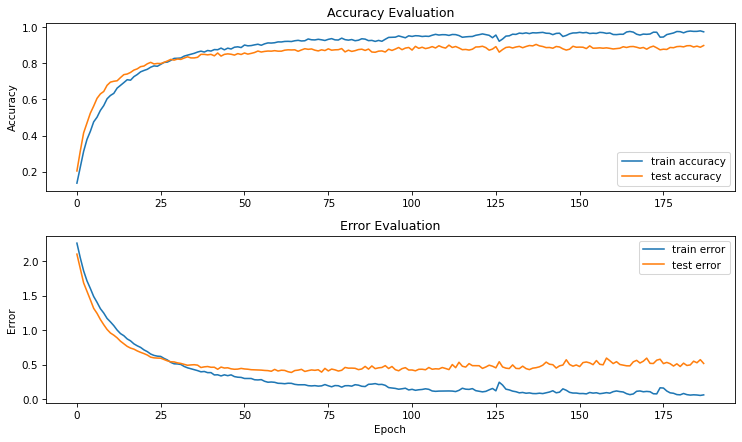


 Plots for Model  2


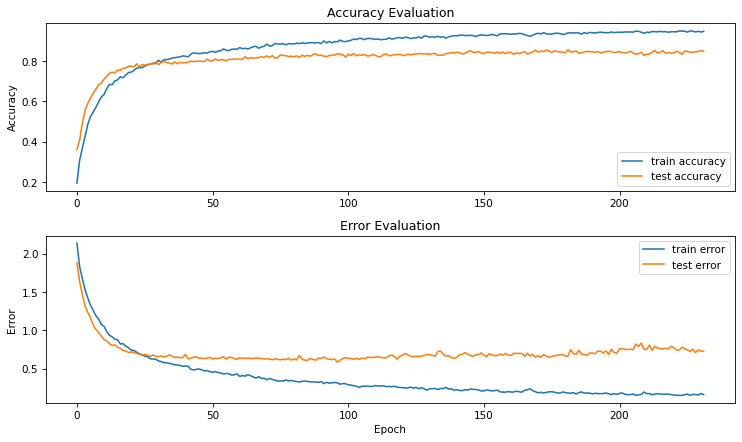


 Plots for Model  3


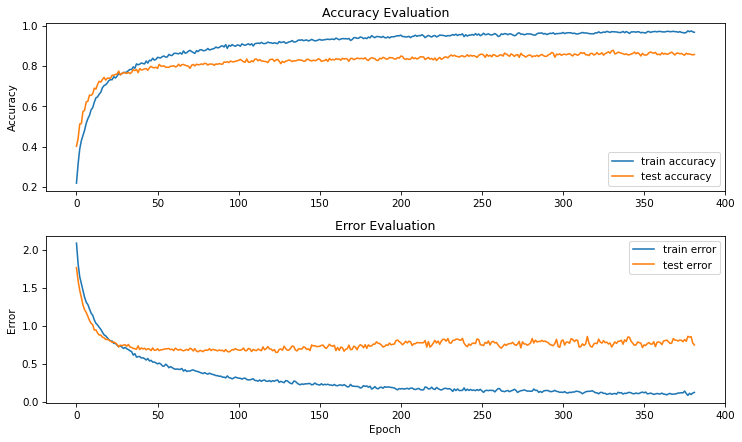


 Plots for Model  4


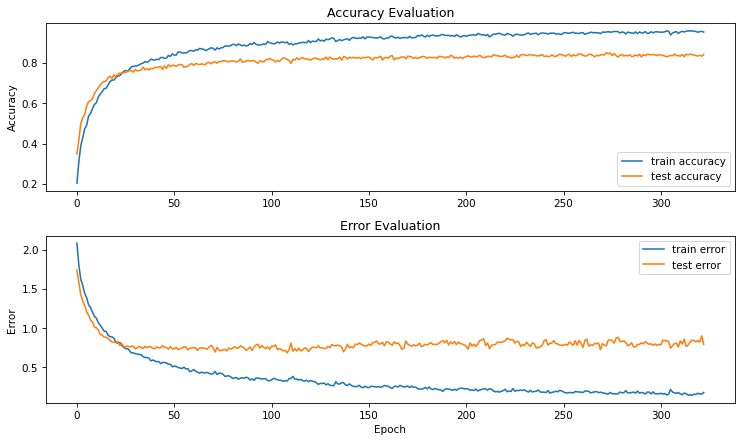


 Plots for Model  5


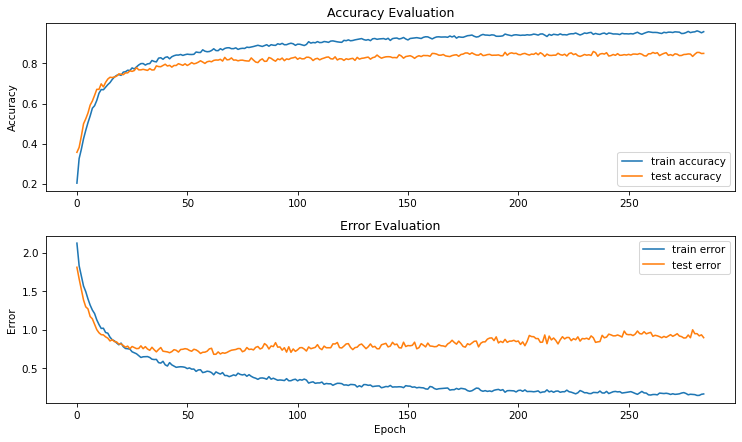


 Plots for Model  6


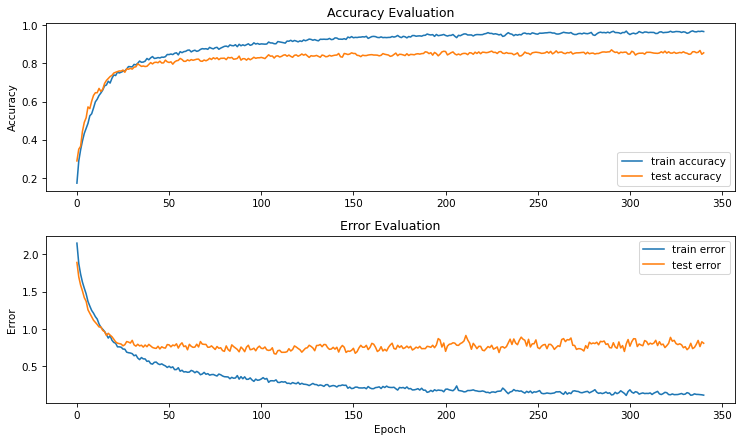

In [10]:
model.plot_all_histories()

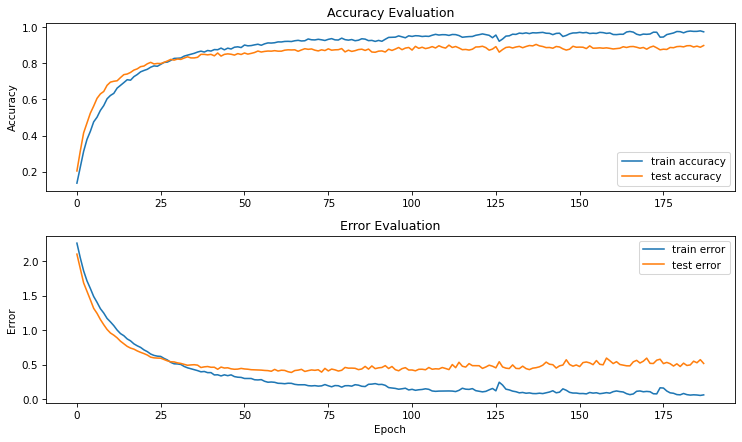

In [11]:
model.plot_history(which_model=1)  # BEST MODEL

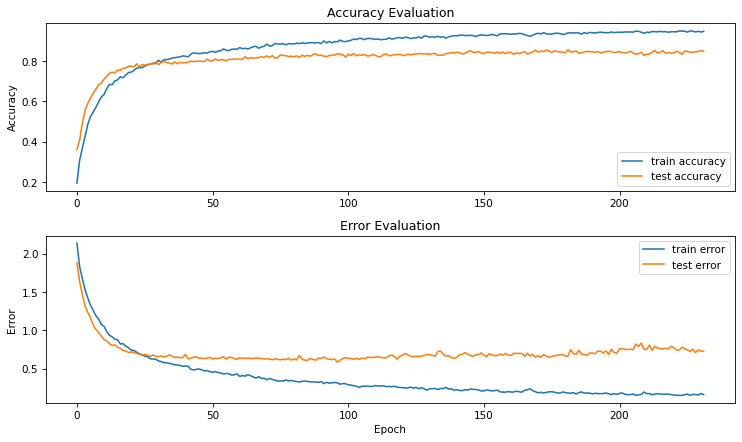

In [12]:
model.plot_history(which_model=2)

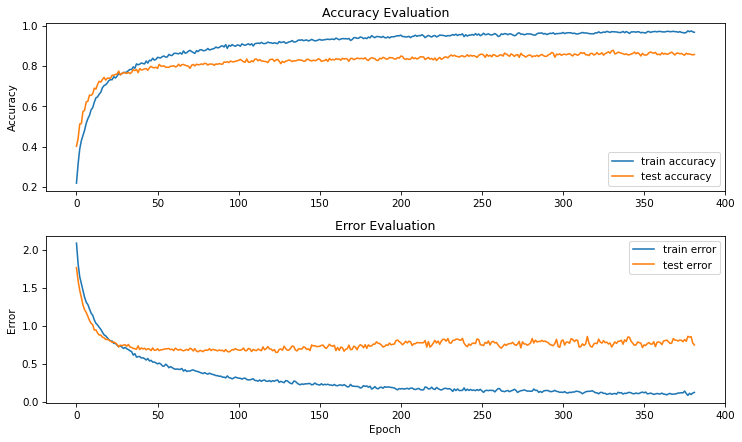

In [13]:
model.plot_history(which_model=3)

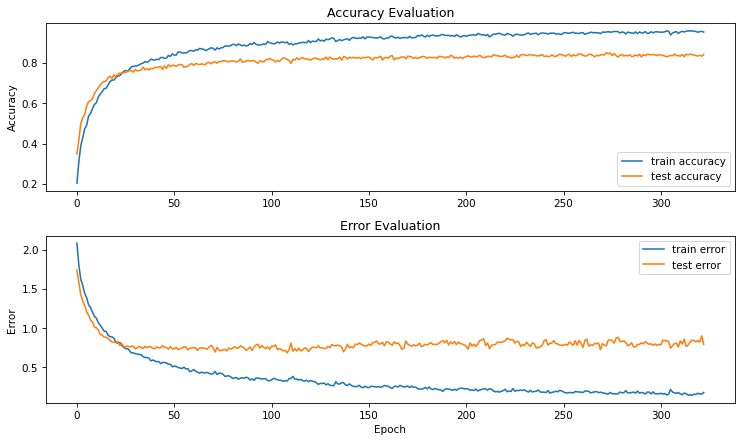

In [14]:
model.plot_history(which_model=4)

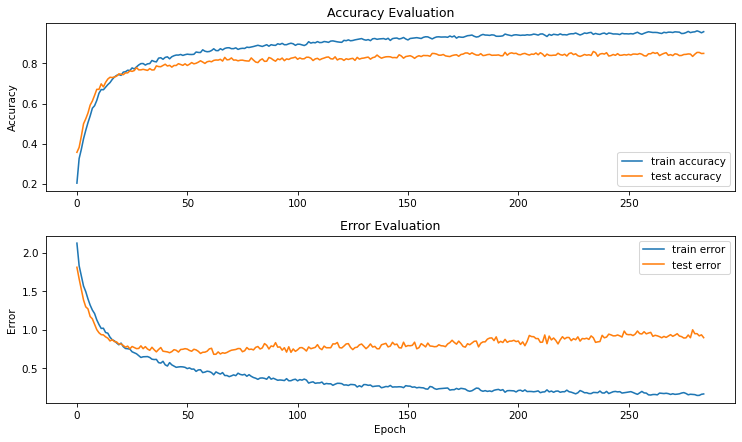

In [15]:
model.plot_history(which_model=5)

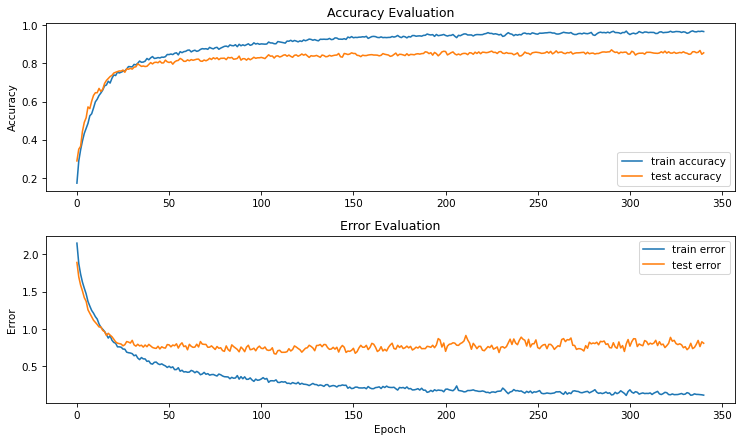

In [16]:
model.plot_history(which_model=6)

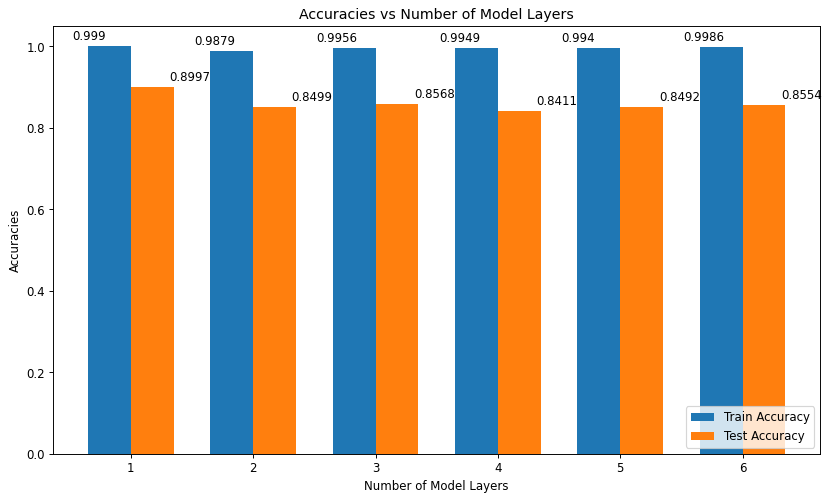

In [17]:
# Plot accuracies vs number of model layers

model.accuracies_vs_models()

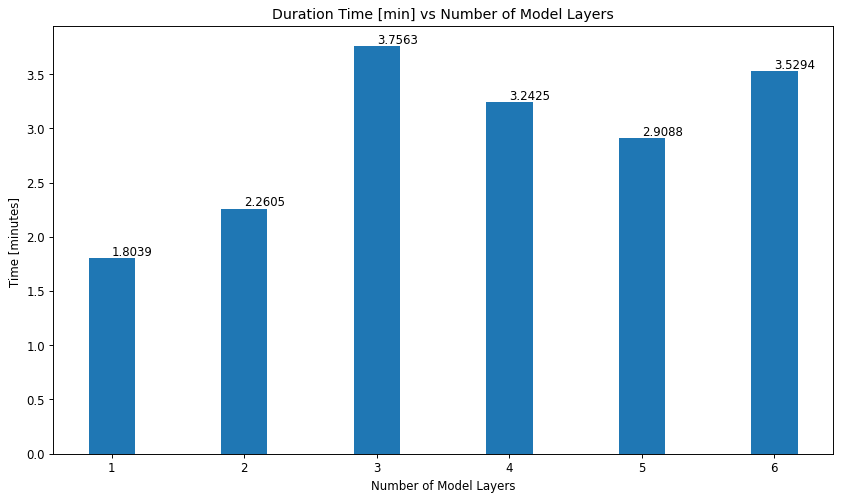

In [18]:
# Plot durations vs number of model layers

model.duration_vs_models()

In [19]:
# Save all generated models

model.save_all_models()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/saved_models_DP_0.2/saved_model_1/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.2/saved_model_2/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.2/saved_model_3/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.2/saved_model_4/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.2/saved_model_5/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.2/saved_model_6/assets


In [20]:
# Save the best model. change the argument accordingly

model.save_best_model(best_model=1)

INFO:tensorflow:Assets written to: models/saved_models_DP_0.2/best_model/assets


In [21]:
# from keras.models import load_model

In [24]:
# Load back the best model

best_model = load_model("models/saved_models_DP_0.2/best_model")

In [25]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
